In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Test Time Wait-K

In [3]:
# segment size 320ms, laal_c measured on A6000
df1 = pd.DataFrame(columns=['K', 'BLEU', 'LAAL', 'LAAL_c', 'segment size'])
df1['segment size'] = [320] * 7
df1['K'] = [1, 3, 5, 7, 9, 11, 13]
df1['BLEU'] = [24.0, 25.5, 28.5, 29.7, 30.8, 31.3, 31.6]
df1['LAAL'] = [1220, 1309, 1683, 2139, 2578, 2972, 3360]
df1['LAAL_c'] = [2057, 2024, 2466, 2977, 3460, 3923, 4395]

In [4]:
# segment size 640ms, laal_c measured on A6000
df2 = pd.DataFrame(columns=['K', 'BLEU', 'LAAL', 'LAAL_c', 'segment size'])
df2['segment size'] = [640] * 7
df2['K'] = [1, 2, 3, 4, 5, 6, 7]
df2['BLEU'] = [28.2, 30.9, 31.6, 32.1, 32.4, 32.6, 32.8]
df2['LAAL'] = [2095, 2428, 2835, 3219, 3573, 3892, 4173]
df2['LAAL_c'] = [2531, 2883, 3349, 3807, 4253, 4656, 5056]

In [5]:
df = pd.concat([df1, df2], ignore_index=True)

In [6]:
df

,K,BLEU,LAAL,LAAL_c,segment size
0,1,24.0,1220,2057,320
1,3,25.5,1309,2024,320
2,5,28.5,1683,2466,320
3,7,29.7,2139,2977,320
4,9,30.8,2578,3460,320
5,11,31.3,2972,3923,320
6,13,31.6,3360,4395,320
7,1,28.2,2095,2531,640
8,2,30.9,2428,2883,640
9,3,31.6,2835,3349,640


In [7]:
df

,K,BLEU,LAAL,LAAL_c,segment size
0,1,24.0,1220,2057,320
1,3,25.5,1309,2024,320
2,5,28.5,1683,2466,320
3,7,29.7,2139,2977,320
4,9,30.8,2578,3460,320
5,11,31.3,2972,3923,320
6,13,31.6,3360,4395,320
7,1,28.2,2095,2531,640
8,2,30.9,2428,2883,640
9,3,31.6,2835,3349,640


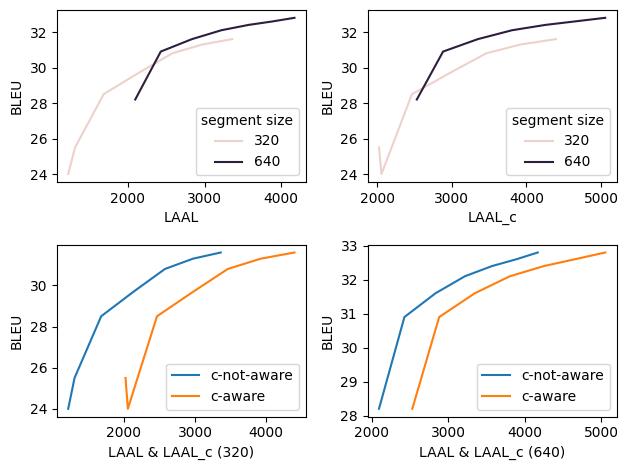

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2)

sns.lineplot(df, x='LAAL', y='BLEU', hue='segment size', ax=axs[0, 0])
sns.lineplot(df, x='LAAL_c', y='BLEU', hue='segment size', ax=axs[0, 1])

sns.lineplot(x=pd.concat([df1['LAAL'], df1['LAAL_c']]), y=pd.concat([df1['BLEU'], df1['BLEU']]), hue=['c-not-aware'] * 7 + ['c-aware'] * 7, ax=axs[1, 0])
axs[1, 0].set_xlabel('LAAL & LAAL_c (320)')

sns.lineplot(x=pd.concat([df2['LAAL'], df2['LAAL_c']]), y=pd.concat([df2['BLEU'], df2['BLEU']]), hue=['c-not-aware'] * 7 + ['c-aware'] * 7, ax=axs[1, 1])
axs[1, 1].set_xlabel('LAAL & LAAL_c (640)')

plt.tight_layout()
plt.savefig('laal_bleu.png', dpi=300)